<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("M3ExploratoryDataAnalysis.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<Figure size 1000x800 with 0 Axes>

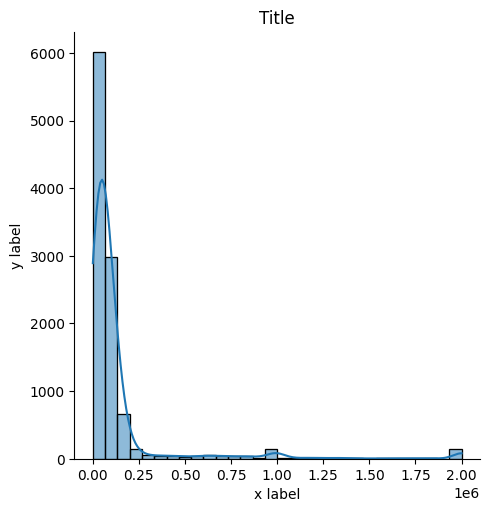

In [24]:
plt.figure(figsize=(10,8))
sns.displot(df['ConvertedComp'], kde=True, bins=30)
plt.title('Title')
plt.xlabel('x label')
plt.ylabel('y label')
plt.show()

Plot the histogram for the column `ConvertedComp`.


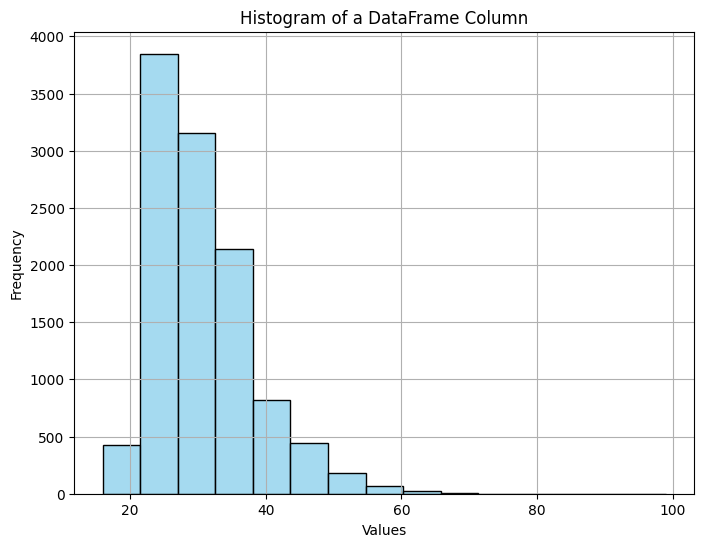

In [85]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=15, color='skyblue', kde=False)
plt.title('Histogram of a DataFrame Column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



What is the median of the column `ConvertedComp`?


In [99]:
#woman=df[df['Gender']=='Woman']
#woman['ConvertedComp'].median()
woman['ConvertedComp'].median()
#df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [31]:
count_of_man = (df['Gender']=='Man').sum()
print('Only identify as a Man: ', count_of_man)

Only identify as a Man:  10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [32]:
count_of_man = (df['Gender']=='Woman').sum()
print('Only identify as a woman: ', count_of_man)

Only identify as a woman:  731


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [66]:
print(df['Age'].describe())


import numpy as np
print(df['Age'].min())
print(df['Age'].quantile(0.25))
print(df['Age'].median())
print(df['Age'].quantile(0.75))
print(df['Age'].max())

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64
16.0
25.0
29.0
35.0
99.0


Plot a histogram of the column `Age`.


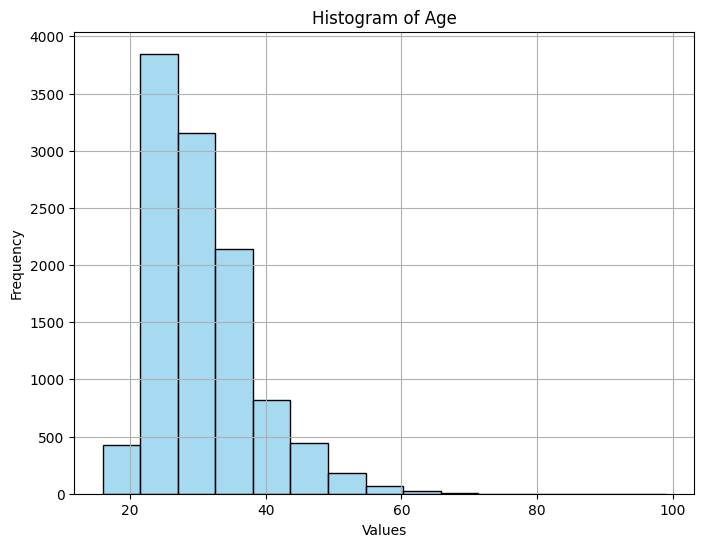

In [48]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=15, color='skyblue', kde=False)
plt.title('Histogram of Age')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


AttributeError: This method only works with the ScalarFormatter

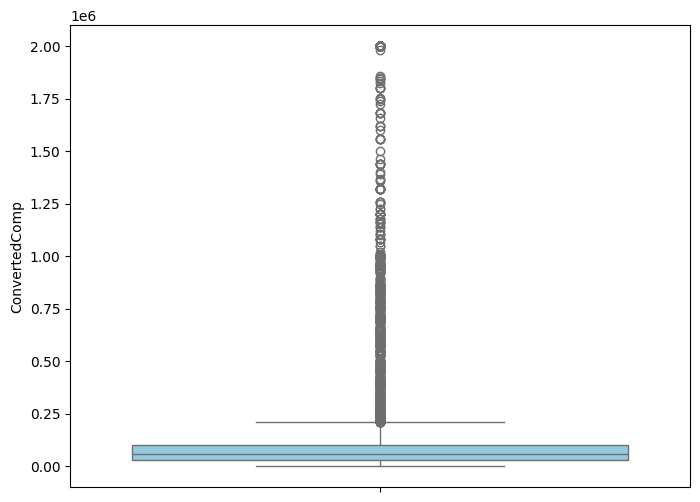

In [63]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


plt.figure(figsize=(8, 6))
sns.boxplot(y=df['ConvertedComp'], color='skyblue')

# Disable scientific notation for both x and y axes
plt.ticklabel_format(style='plain',axis='both')

plt.title('Boxplot of ConvertedComp to Identify Outliers')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [64]:
Q1=df['ConvertedComp'].quantile(0.25)
Q3=df['ConvertedComp'].quantile(0.75)
IQR=Q3-Q1
print('Inter Quartile Range for ConvertedComp is:',IQR)

Inter Quartile Range for ConvertedComp is: 73132.0


Find out the upper and lower bounds.


In [67]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print('lower bound :',lower_bound)
print('upper bound :',upper_bound)


lower bound : -82830.0
upper bound : 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [69]:
outliers = df[(df['ConvertedComp']<lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers=outliers.shape[0]
print('Number of outliers in ConvertedComp : ',num_outliers)



Number of outliers in ConvertedComp :  879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64
count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64


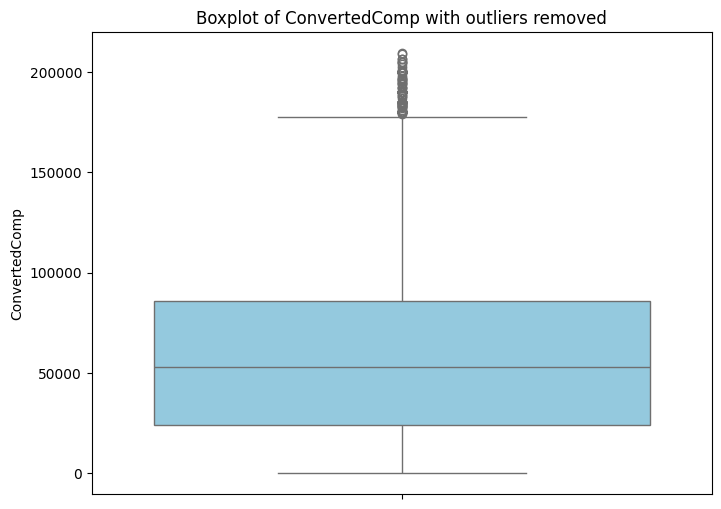

59883.20838915799

In [103]:
dfN=df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

print(dfN['ConvertedComp'].describe())
print(df['ConvertedComp'].describe())


plt.figure(figsize=(8, 6))
sns.boxplot(y=dfN['ConvertedComp'], color='skyblue')

plt.title('Boxplot of ConvertedComp with outliers removed')
plt.show()

dfN['ConvertedComp'].median()
dfN['ConvertedComp'].mean()

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [83]:
columns_to_select=['Respondent','YearsCode','Age1stCode','CompTotal','ConvertedComp','WorkWeekHrs','CodeRevHrs','Age']
dfNumeric=dfN[columns_to_select].copy()
correlation=dfNumeric['ConvertedComp'].corr(df['Age'])
print('Correlation with Age : ',correlation)



Correlation with Age :  0.40182139971221725


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
